# Week 03 Exercises and Solutions

**Exercise**: Make sure you finish the exercises for Week 1 and 2!

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Exercise**: Plot the formula $0.2 * (0.7^x)$ for $x \in [0, 20]$. You should get a result like this:

![](img/exercise_x_02_07_x.png)

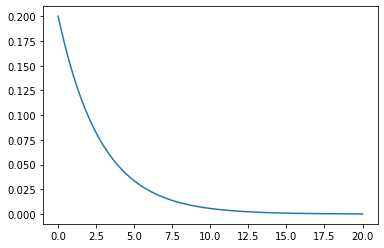

In [6]:
x = np.linspace(0, 20, 101, endpoint=True)
plt.plot(x, 0.2 * (0.7 ** x));

**Exercise**: in `W03_01_Regression_by_Guessing.ipynb` we suggested to try to produce some better guesses for the function $y=f(x)$. What is the best function you can find? What RMSE and $R^2$ do you achieve? Use the code below to start.

In [8]:
df = pd.read_csv("data/cell_growth.csv")

In [9]:
x = df["x"]
y = df["y"]

In [10]:
# start at 0, go to 10, give 101 evenly-spaced points, including 10 itself
xgrid = np.linspace(0, 10, 101, endpoint=True)

In [11]:
def f_guess(x): return 3 * np.log(0.5 * x + 1)
def f_guess2(x): return 1.3 ** x
def xsq(x): return x**2
def xcub(x): return x**3
def logx1(x): return np.log(x+1)
def my_weird_fn(x): return 0.1 * np.exp(0.5 * x)

guesses = [f_guess, f_guess2, xsq, xcub, logx1, my_weird_fn]

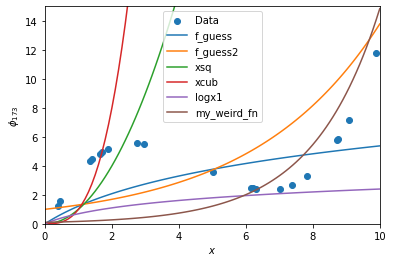

In [12]:
plt.scatter(x, y, label="Data")
for guess in guesses: # loop to plot multiple guesses
    plt.plot(xgrid, guess(xgrid), label=guess.__name__)
plt.xlim((0, 10))
plt.ylim((0, 15))
plt.xlabel(r"$x$")
plt.ylabel(r"$\phi_{173}$")
plt.legend();

In [13]:
def rmse(a, b):
    return np.sqrt(np.mean((a - b)**2))

def rsquared(a, b):
    M = np.corrcoef(a, b)
    R = M[0, 1]
    return R**2

In [14]:
results = []
for guess in guesses:
    guess_y = guess(x)
    result = (guess.__name__, rmse(y, guess_y), rsquared(y, guess_y))
    results.append(result)
results_df = pd.DataFrame(results, columns=('fn_name', 'rmse', 'rsquared'))
results_df

,fn_name,rmse,rsquared
0,f_guess,2.547070,0.120032
1,f_guess2,3.161769,0.298017
2,xsq,42.225042,0.224947
3,xcub,388.647031,0.329021
4,logx1,3.548263,0.122482
5,my_weird_fn,3.061098,0.467703


In [15]:
def solution(x):
    # an approximate solution is a cubic as follows.
    c0, c1, c2, c3, c4, c5 = [0.1,  3.9, -0.228, -9.86,  5.24, 27.5]
    return c0 * (x - c1)**3 + c2 * (x - c3)**2 + c4 * x + c5

guesses = [solution]

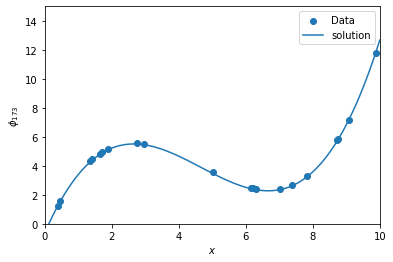

In [16]:
plt.scatter(x, y, label="Data")
for guess in guesses: # loop to plot multiple guesses
    plt.plot(xgrid, guess(xgrid), label=guess.__name__)
plt.xlim((0, 10))
plt.ylim((0, 15))
plt.xlabel(r"$x$")
plt.ylabel(r"$\phi_{173}$")
plt.legend();

How did I find that solution? 

This goes beyond the Programming & Tools for AI curriculum! But if you're interested, one approach is based on `scipy.optimize.curve_fit`. If we can guess that it's a cubic (because there seem to be two turns in the curve of the data), then we can write a generic cubic formula:

In [17]:
def f3(x, c0, c1, c2, c3, c4, c5):
    return c0 * (x - c1)**3 + c2 * (x - c3)**2 + c4 * x + c5

Now, to find the `c` values, we provide the function, the `x` values and the true `y` values. Scipy will find the best `c` values to minimise the error between the true `y` and the predicted `y`.

In [18]:
import scipy.optimize
c, cov = scipy.optimize.curve_fit(f3, x, y)

Now we have `c` values:

In [19]:
c

array([ 0.09996652,  4.10418098, -0.16868268, -9.79960832,  3.57726188,
       22.53836535])

We can get predictions by calling `f3` with both `x` and `c`. Because `f3` expects `c0`, `c1`, etc rather than an array `c`, we use `*c`.

In [20]:
yhat = f3(x, *c)
print(rmse(y, yhat), rsquared(y, yhat))

0.0056962558139781565 0.999994024057441
